<a href="https://colab.research.google.com/github/ritwiks9635/ML_Search_Engine/blob/main/Query_Image_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Query Image Search**

[Dataset](https://www.kaggle.com/datasets/arnaud58/landscape-pictures)

In [2]:
import zipfile

# Specify the zip file path and the extraction directory
zip_file_path = "/content/https:/www.kaggle.com/datasets/arnaud58/landscape-pictures/landscape-pictures.zip"
extract_to = "/content/images/"

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extract_to)

print("Extraction complete!")

Extraction complete!


In [4]:
print(len(os.listdir("/content/images")))

4319


In [ ]:
!pip install sentence_transformers

In [13]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image
import os
from tqdm.autonotebook import tqdm
torch.set_num_threads(4)

In [9]:
model = SentenceTransformer('clip-ViT-B-32')

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [10]:
img_dir = "/content/images"

In [11]:
img_path = list(glob.glob("/content/images/*.jpg"))[:1000]
print("Total Images ::", len(img_path))

Total Images :: 1000


In [12]:
img_embedd = model.encode([Image.open(path) for path in img_path], batch_size = 128, convert_to_tensor = True, show_progress_bar = True)

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

In [14]:
def SearchImages(query, k = 1):
    query_embedd = model.encode(query, convert_to_tensor = True, show_progress_bar =True)

    preds = util. semantic_search(query_embedd, img_embedd, top_k = k)[0]

    print("Query")
    display(query)

    for pred in preds:
        display(Image(os.path.join(img_dir, img_path[pred['corpus_id']]), width=500,height=500))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Query


'desert with cactus'

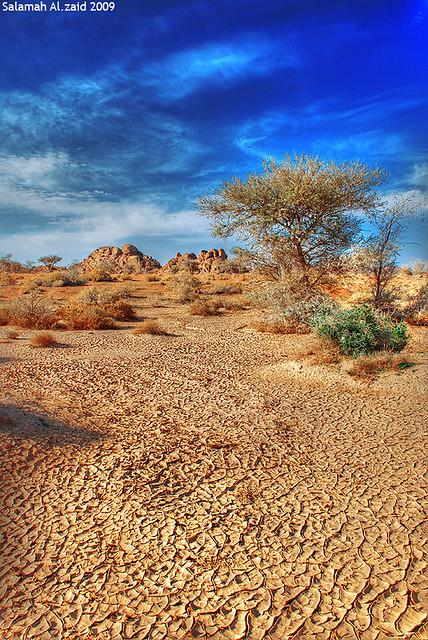

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Query


'a hot desert'

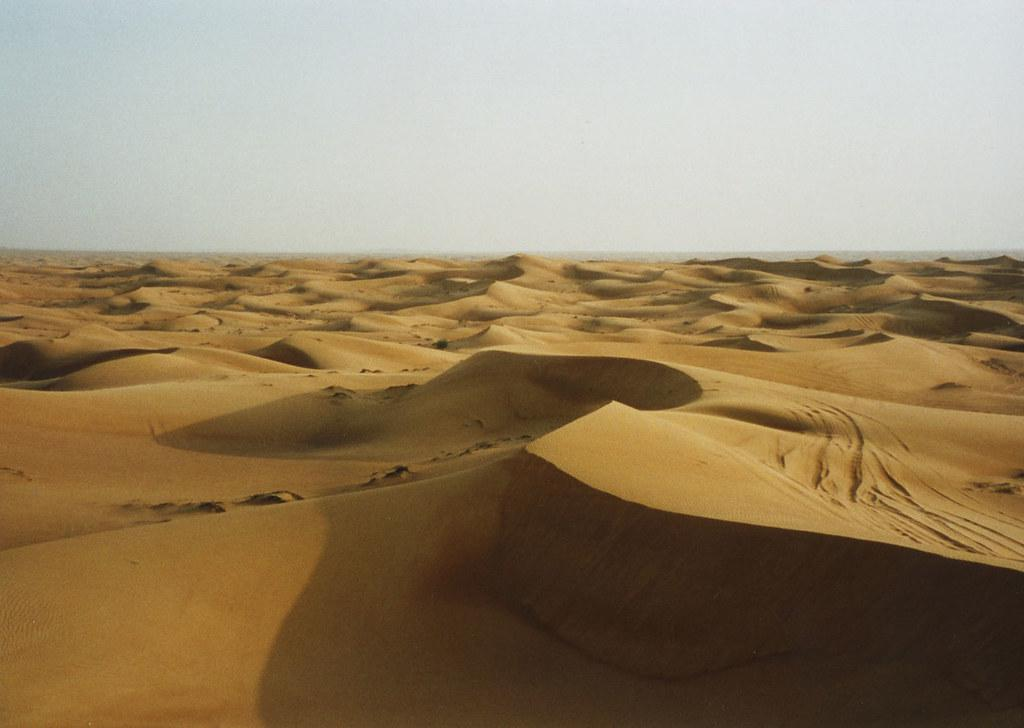

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Query


'mountain range with snow'

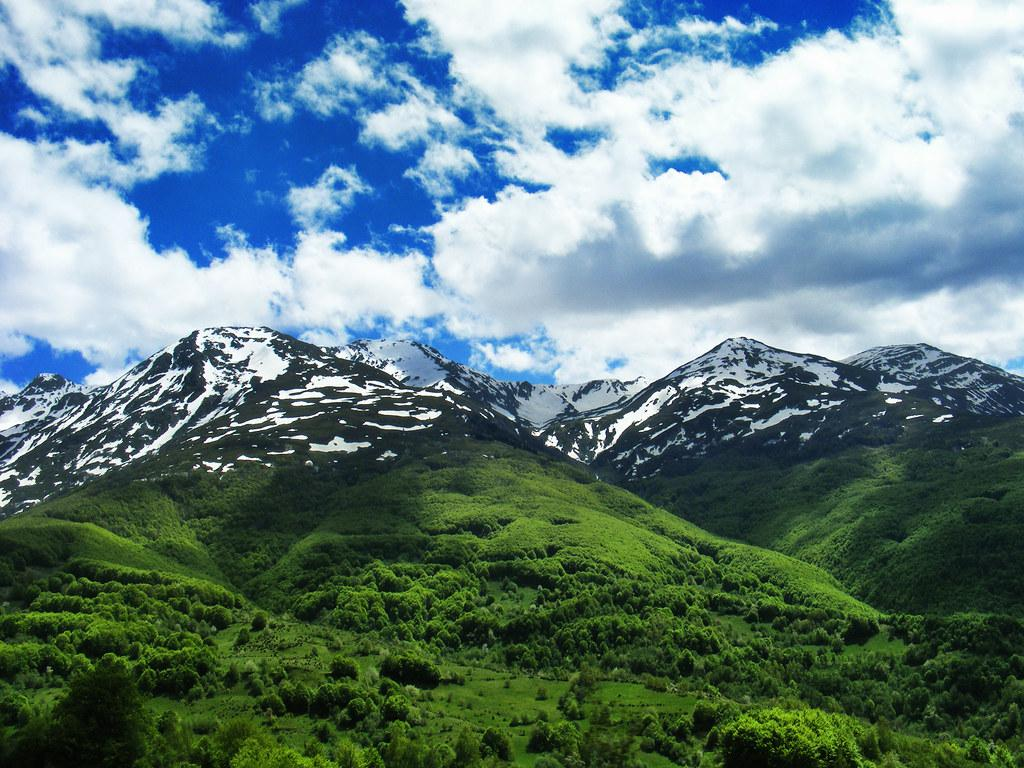

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Query


'mountains with green grass and trees'

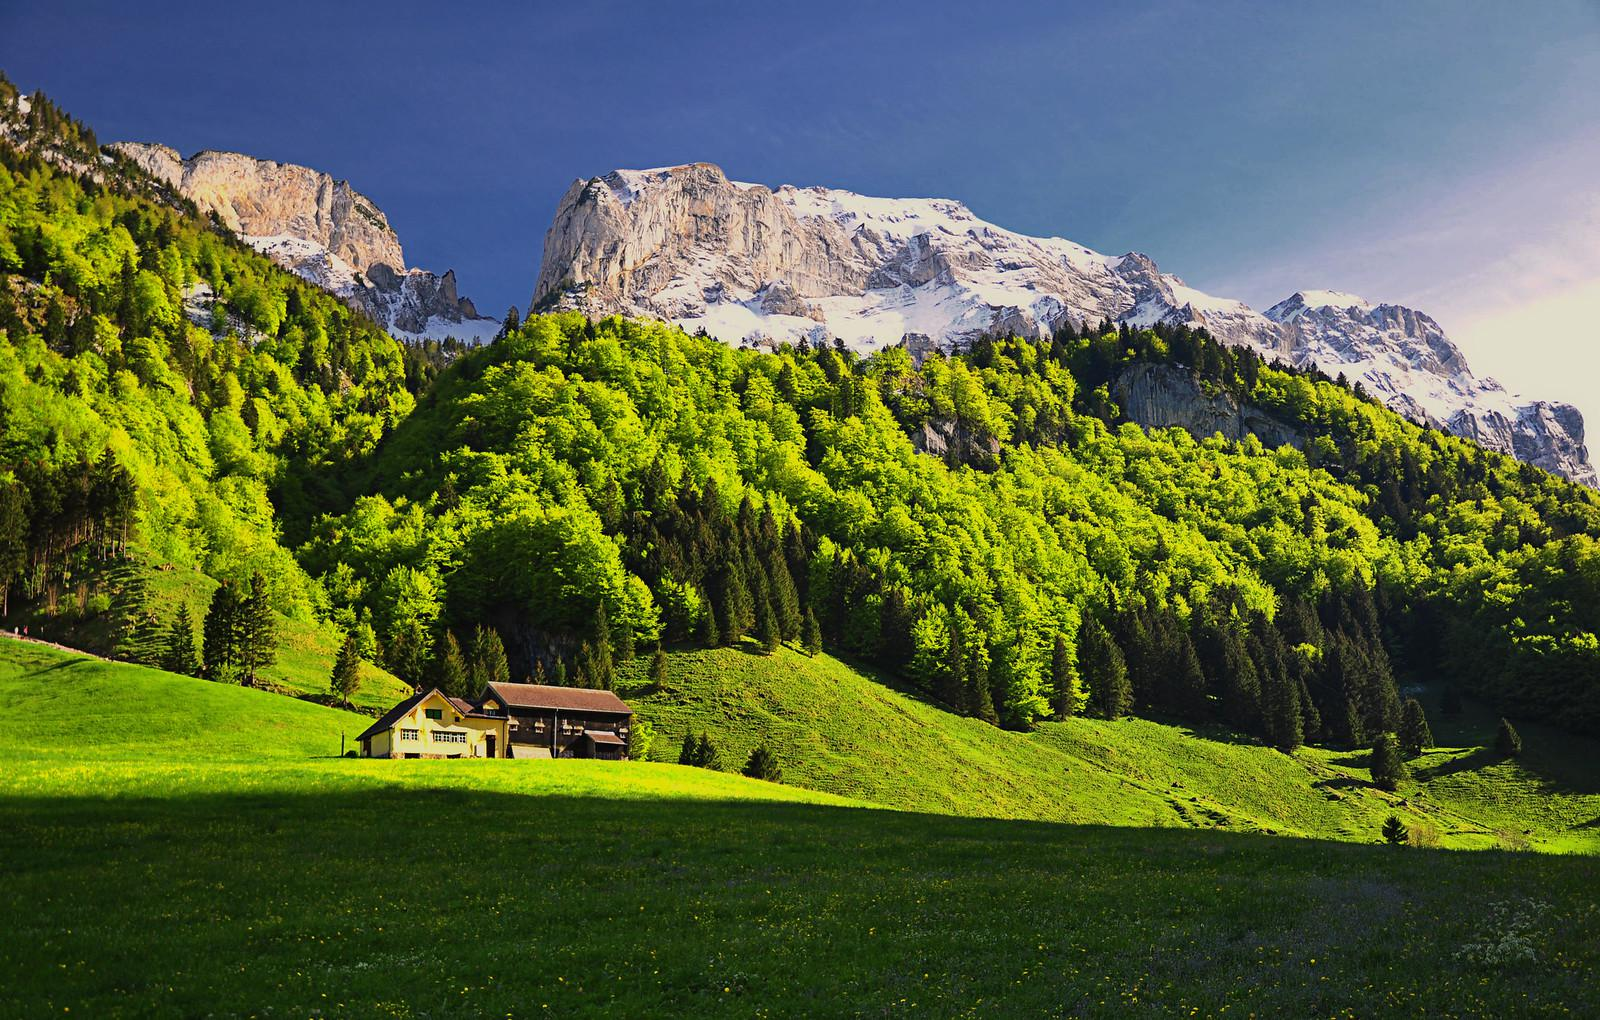

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Query


'beach with palm trees'

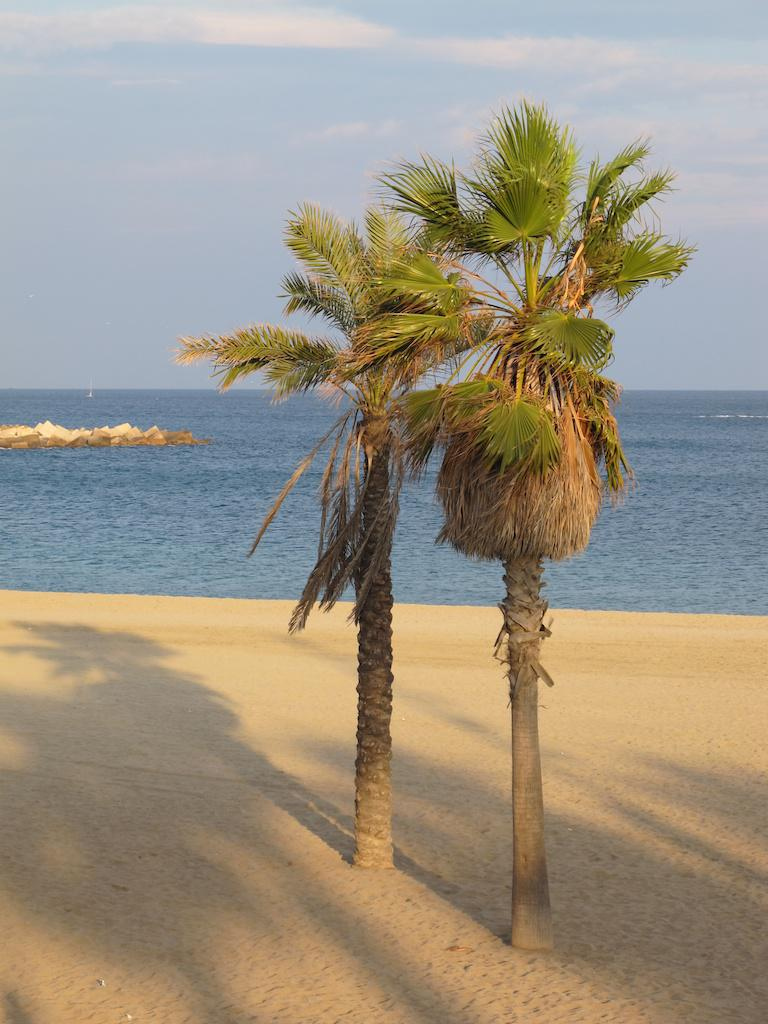

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Query


'tropical island'

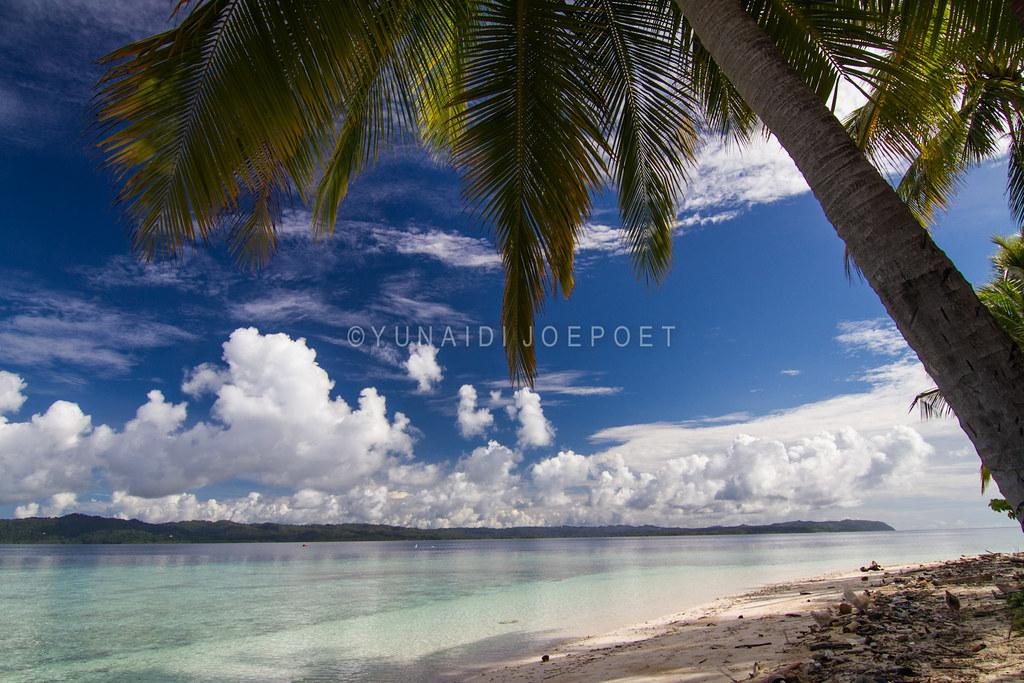

In [15]:
queryes = ['desert with cactus','a hot desert',
               'mountain range with snow','mountains with green grass and trees',
               'beach with palm trees','tropical island']

for query in queryes:
    SearchImages(query)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Query


'the house in mountain'

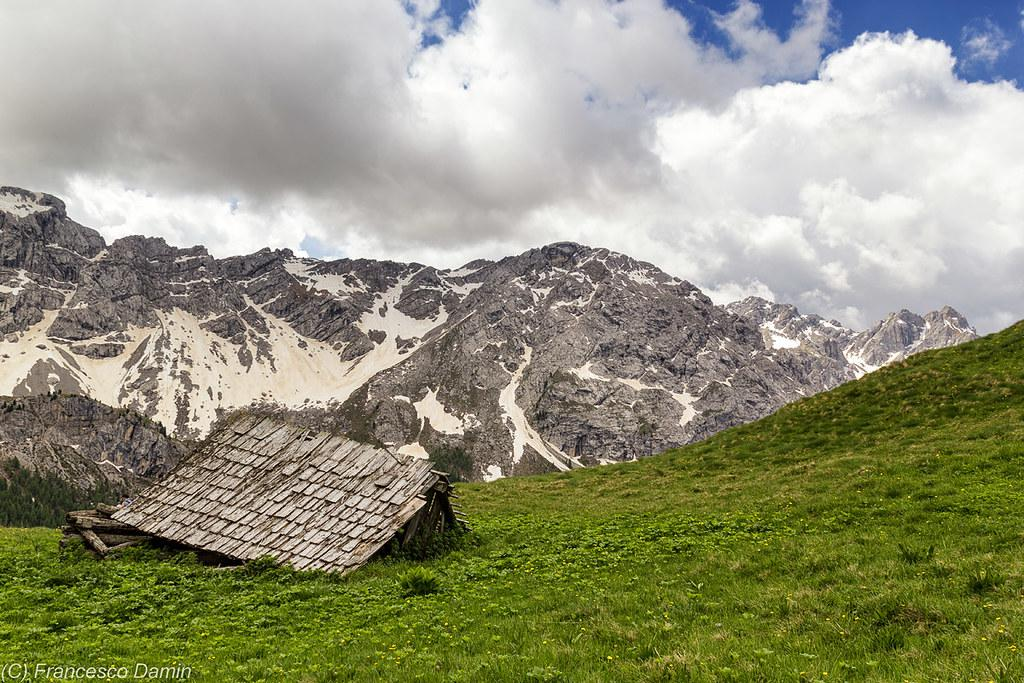

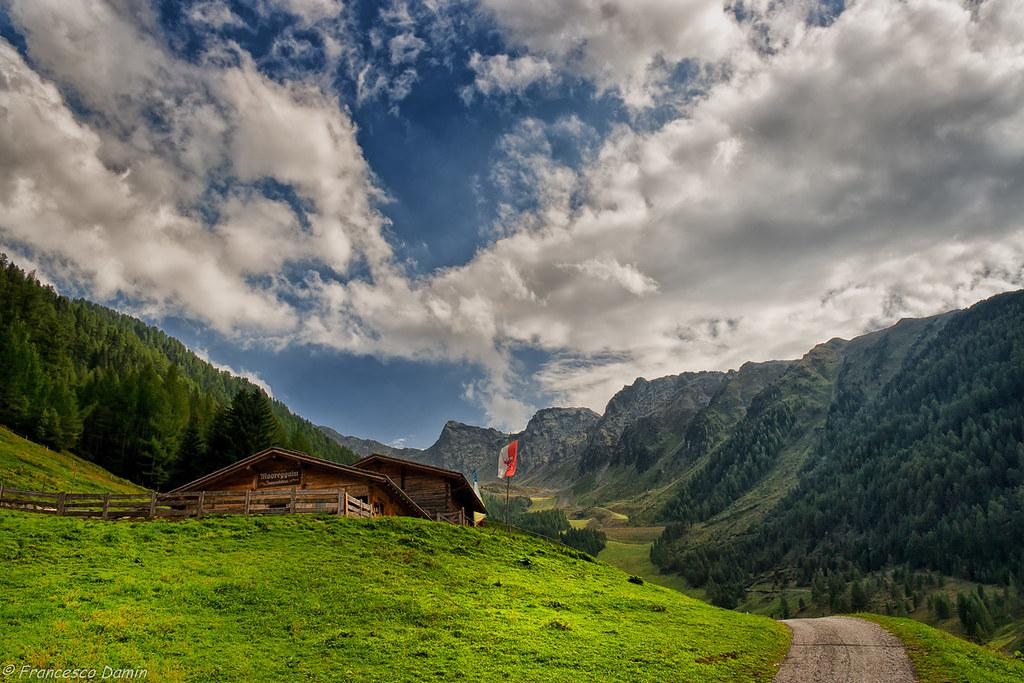

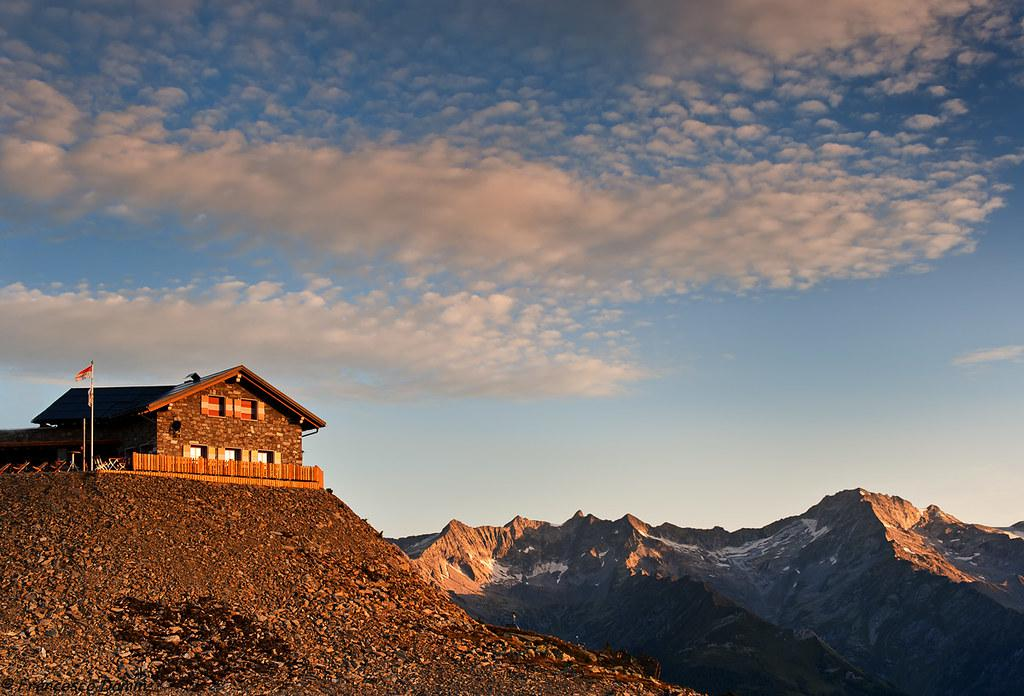

In [16]:
SearchImages("the house in mountain", k = 3)